<a href="https://colab.research.google.com/github/gabriellfelipe7/ExploratoryDataAnalysis_StudentsPerformanceExams/blob/main/Students_Performace_in_Exams.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Students Performance in Exams**
Gabriel Felipe Machado de Oliveira, 2022

# **1. Informações do dataset**

## 1.1. Extração
O dataset utilizado no presente estudo foi extraído da plataforma Kaggle (https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams). 

## 1.2. Definições e variáveis
A base de dados traz informações do desempenho de estudantes em uma avaliação a fim de se analisar seus desempenhos em três principais competências: cálculo matemático; leitura; e escrita. Como ferramenta de mensuração foi utilizado um score do teste para cada uma das competências consideradas. O dataset basicamente busca a resposta para questões do tipo:
- Quão eficaz é o curso de preparação para o teste?
- Quais os principais fatores que contribuem para os resultados dos testes?
- Qual seria a melhor maneira de melhorar as notas dos alunos em cada teste?
- Que padrões e interações nos dados você pode encontrar


Vale ressaltar que trata-se de uma base de dados fictícia de estudantes. Para o link gerador da base siga: http://roycekimmons.com/tools/generated_data/exams

## 1.3. Variáveis
As colunas da base e suas respectivas explicações seguem abaixo:
- gender: gênero do participante;
- race/ethnicity: grupos de raças/etinias;
- parental level of education: nível de escolaridade dos pais;
- lunch: informações da alimentação do candidato;
- test preparation course: se o participante concluiu ou não o curso preparatório do exame;
- math score: pontuação de matemática do estudante;
- reading score: pontuação de leitura do estudante;
- writing score: pontuação de escrita na escrita.

## 1.4. Tamanho do dataset
O dataset utilizado possui um total de 8 colunas e 1000 linhas.

# **2. Objetivos**

##2.1. Introdução
O objetivo principal do estudo é, através de métodos estatísticos, analisar correlações entre variáveis explicativas e as variáveis respotas (scores). O modelos estatísticos utilizados serão especificados conforme o avanço do estudo e o nível de significância para todos testes será de 5% ($α = 0.05$). Serão utilizados testes de hipóteses a fim de responder peguntas previamente realizadas.

## 2.2. Tópico de abordagem
Como guia para o estudo, utilizei uma pergunta provocativa, sendo ela:
- Estudantes de gênero masculinos possuem scores maiores em matemática que estudantes do gênero feminino?



# **3. Extração e Limpeza da Base de Dados**
Etapa prática introdutória voltada para limpeza e adequação dos dados. 


In [ ]:
#Extração de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as sts 

In [ ]:
#Extração dos dados e visualização
data = pd.read_csv('exams.csv')
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68
5,female,group D,high school,standard,none,63,77,76
6,female,group A,bachelor's degree,standard,none,62,59,63
7,male,group E,some college,standard,completed,93,88,84
8,male,group D,high school,standard,none,63,56,65
9,male,group C,some college,free/reduced,none,47,42,45


In [ ]:
#Análise dos tipos de dados
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Há 5 variáveis categóricas e 3 numéricas inteiras.

In [ ]:
#Bucando valores nulos
data.isnull()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [ ]:
#Buscando valores vazios
data.isna()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


Como visto, os dados estão prontos para serem analisados. Não há valores vazios ou nulos.

# **4. Análise das variáveis quantitativas**
A fim de eventualmente fazer suposições sobre os parâmetros da população, o teste da normalidade das variáveis quantitativas se fez necessário. Trata-se de uma base com 1000 observações (um $n$ suficientemente grande), isto é, o Teorema Central do Limite garantiria a normalidade. Entretanto, vamos utilizar um Teste de Normalidade não-paramétrico para verificarmos mais afundo se a mostra de notas dos estudantes nas três competências seguem uma distribuição Normal.


## 4.1. Variavel: 'math score' 


### 4.1.1. Visualização da amostra

Visualização da amostra:

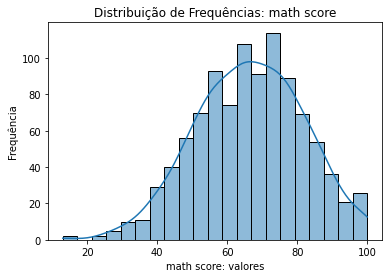

In [ ]:
plt.xlabel('math score: valores')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: math score')
sns.histplot(data=data, x="math score", kde=True)

Através do plot, analisamos algumas possibilidades da distribuição da variável:
- a variável segue uma normal com assimetria à esquerda;
- média próximo de 70.

### 4.1.2. Escolha do Teste e Aplicação na Amostra

Temos várias opções de Testes Não-Paramétricos que verificam a Normalidade. Vamos optar por usar o Shapiro-Wilk. Além desse ser poderoso para tal verificação, nossa base satisfaz seus pré requisitos.

Instalação das bibliotecas:

In [ ]:
!pip install scipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy import stats
import scipy

Aplicação do teste:

In [ ]:
x = data['math score']
shapiro_test = stats.shapiro(x)
print('*** RESULTADO - VARIÁVEL: MATH SCORE ***')
print(shapiro_test)

*** RESULTADO - VARIÁVEL: MATH SCORE ***
ShapiroResult(statistic=0.9950758218765259, pvalue=0.0025056363083422184)


### 4.1.3. Decisão

Temos que $p-valor < α = 0.05$. Ou seja, ao nível de confiança de 0.05 a amostra nos fornece evidências que os dados seguem uma distribuição normal provada pelo método de Shapiro-Wilk.

## 4.2. Variável: "reading score"

### 4.2.1. Visualização dos dados

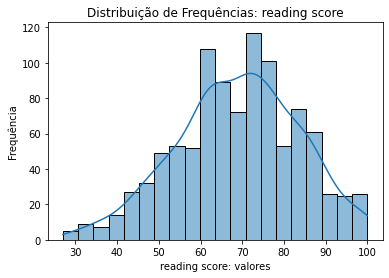

In [ ]:
plt.xlabel('reading score: valores')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências: reading score')
sns.histplot(data=data, x="reading score", kde=True)

Algumas possibilidade e considerações podem ser tiradas da variável "reading score", segue:
- possivelmente trata-se de uma distribuição normal com assimetria à esquerda;
- a média é próxima de 70.

###4.2.2. Aplicação do Teste na Amostra

In [ ]:
x = data['reading score']
shapiro_test = stats.shapiro(x)
print('*** RESULTADO - VARIÁVEL: READING SCORE ***')
print(shapiro_test)

*** RESULTADO - VARIÁVEL: READING SCORE ***
ShapiroResult(statistic=0.9930004477500916, pvalue=0.00011787991388700902)


### 4.2.3. Decisão
Com um $p-valor = 0.00012 < 𝛂 = 0.05$, concluímos que ao nível de significância de 5%, os dados nos dão evidências de que a variável "reading score" segue uma distribuição Normal baseada no teste de Shapiro-Wilk. 

## 4.3. Variavel: "writing score"

### 4.3.1. Visualização dos Dados

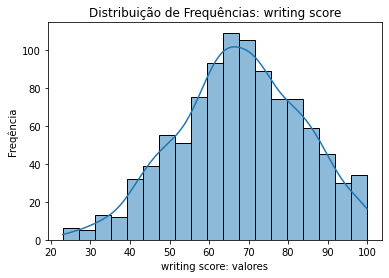

In [ ]:
plt.xlabel('writing score: valores')
plt.ylabel('Freqência')
plt.title('Distribuição de Frequências: writing score')
sns.histplot(data=data, x="writing score", kde=True)

Aravés da visualização, podemos supor possíveis infrências:
- trata-se de uma variável com distribuição Normal com assimetria à esquerda;
- média próximo de 65.

### 4.3.2. Aplicação do Teste na Amostra

In [ ]:
x = data['writing score']
shapiro_test = stats.shapiro(x)
print('*** RESULTADO - VARIÁVEL: WRITING SCORE ***')
print(shapiro_test)

*** RESULTADO - VARIÁVEL: WRITING SCORE ***
ShapiroResult(statistic=0.9930291175842285, pvalue=0.0001226694294018671)


###4.3.3. Decisão
Com um $p-valor = 0.00012 < 𝛂 = 0.05$, concluímos que ao nível de significância de 5%, os dados nos dão evidências de que a variável "wiriting score" segue uma distribuição Normal baseada no teste de Shapiro-Wilk.

#5.Intervalos de Confiança para μ
Antes de abordarmos testes de hipóteses, um tópico importante para investigação, seria o intervalo de confiança para a média pupulacional $μ$. Perceba que possuimos apenas os valores dos scores de cada estudantes colhidos para a pesquisa, isto é, apenas valores amostrais. Utilizando do Intervalo de confiança, estimamos $μ$ e atribuímos pra ele um intervalo numérico confiável.

Contexto e metodologia: 
- Possuímos em mãos uma amostra com 1000 observações e já testamos se ela pode ou não ser descrita com uma distribuição Normal (ver tópico 4), assim utilizaremos o teste Z para calcular o Intervalo de Confiança;
- Temos um desvio padrão desconhecido ($𝜎$ desconhecido), utilizaremos o estimador $s$ para o cálculo;
- Para todos os Intervalos de Confiança, usaremos um nível de confiança de 95% ($β = 1 - α = 0.95$)

## 5.1. Variável: "math score"

Estatísticas da amostra:

In [ ]:
x_barra = np.mean(data['math score'])
s = np.std(data['math score'])
n = data.shape[0]
zalpha = abs(scipy.stats.norm.ppf((1 - 0.95)/2.))
print('*Informações da Amostra*')
print(f'x_barra = {round(x_barra,4)}; s = {round(s,4)}; n = {n}; zalpha = {round(zalpha,4)}')

*Informações da Amostra*
x_barra = 66.396; s = 15.3952; n = 1000; zalpha = 1.96


Cálculo do limite inferior do I.C.:

In [ ]:
zalpha = abs(scipy.stats.norm.ppf((1 - 0.95)/2.))

In [ ]:
LI = x_barra - zalpha*(s/(n**(1/2)))
print('Limite inferior:', round(LI,4))

Limite inferior: 65.4418


Cálculo do Limite superior do I.C.:

In [ ]:
LS = x_barra + zalpha*(s/(n**(1/2)))
print('Limite superior:', round(LS,4))

Limite superior: 67.3502


Assim chegamos a conclusão de que um Intervalo de Confiança para a média populacional da variável "math score" com $β = 0.95$ será de:



$$
IC(μ,\,\, 0.95,\,\, ''math\,\, score'') = (65.4418; 67.3502)
$$

## 5.2. Variável: "reading score"
Estatísticas da amostra:

In [ ]:
x_barra = np.mean(data['reading score'])
s = np.std(data['reading score'])
n = data.shape[0]
zalpha = abs(scipy.stats.norm.ppf((1 - 0.95)/2.))
print('*Informações da Amostra*')
print(f'x_barra = {round(x_barra,4)}; s = {round(s,4)}; n = {n}; zalpha = {round(zalpha,4)}')

*Informações da Amostra*
x_barra = 69.002; s = 14.7299; n = 1000; zalpha = 1.96


Calculando o Limite Inferior:

In [ ]:
LI = x_barra - (zalpha * (s/(n**(1/2))))
print(f'Limite inferior: {round(LI,4)}')

Limite inferior: 68.089


Calculando o Limite Superior:

In [ ]:
LS = x_barra + (zalpha +(s/(n**(1/2))))
print(f'Limite superior: {round(LS, 4)}')

Limite superior: 71.4278


Chegamos a conclusão de que um Intervalo de Confiança para a média populacional da variável "reading score" com $β = 0.95$ será de:


$$
IC(μ,\,\, 0.95,\,\, ''reading\,\, score'') = (68.089; 71.4278)
$$

##5.3. Variável: "writing score"
Cálculo das estatísticas:

In [ ]:
x_barra = np.mean(data['writing score'])
s = np.std(data['writing score'])
n = data.shape[0]
zalpha = abs(scipy.stats.norm.ppf((1 - 0.95)/2.))
print('*Informações da Amostra*')
print(f'x_barra = {round(x_barra,4)}; s = {round(s,4)}; n = {n}; zalpha = {round(zalpha,4)}')

*Informações da Amostra*
x_barra = 67.738; s = 15.5932; n = 1000; zalpha = 1.96


Cálculo do limite inferior e do limite superior:

In [ ]:
LI = x_barra - (zalpha*(s/(n**(1/2))))
LS = x_barra + (zalpha*(s/(n**(1/2))))

print(f'Limite inferior: {round(LI,4)}')
print(f'Limite superior: {round(LS,4)}')

Limite inferior: 66.7715
Limite superior: 68.7045


Assim, chegamos que o Intervalo de Confiança para a média populacional da variável "writing score" considerando $β = 0.95$ será de:


$$
IC(μ,\,\, 0.95,\,\, ''writing\,\, score'') = (66.7715; 68.7045)
$$

# 6.Análise Gráfica das Correlações

Além de verificarmos a normalidade das variáveis quantitativas, podemos também analisar suas correleções. Para isso, geraremos uma matriz de correlações:

In [ ]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.819398,0.805944
reading score,0.819398,1.000000,0.954274
writing score,0.805944,0.954274,1.000000


Perceba, que a matriz , de maneira explícita, diz muito pouco sobre as correlações. Colocando-a em um mapa de calor conseguimos analisar mais afundo:

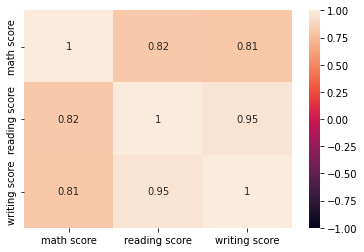

In [ ]:
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot = True)

Agora, com uma visualização gráfica, podemos inferir ideias claras acerca das correlações:
- a correlção da pontuação de escrita e leitura é alta, isto é, estudantes que lêem bem também escrevem bem e vice-versa;
- embora a correlação da pontuação no teste de matemática com o teste de leitura e escrita seja menor que entre os dois últimos, há um alta taxa de correlção entre as três competências.

#7.Testes de Hipóteses

Como especificado no início do estudo, nosso Teste de Hipótese será voltado à um tópico específico, sendo ele:
*Estudantes de gênero masculino possuem scores em matemática maiores que estudantes do gênero feminino?*


## 7.1. Tópico 1
**Estudantes de gênero masculino possuem scores maiores que estudantes de gênero feminino em matemática.**

### 7.1.1. Formulação das Hipóteses
Intepretando o tópico e relambrando os tipos de testes que possuímos, chegamos a conclusão inical de que trata-se de um teste de hipótese unilateral à direita. Vamos tartar o tópico como um problema de desigualdade, isto é, vamos testar a igualdade das médias dos dois públicos (masculino e feminino) da variável "math score" com $α  =0.05$.

Seleção das amostras:

In [ ]:
data_m = data[data['gender'] == 'male'] #Amostra apenas com público masculino
data_f = data[data['gender'] == 'female'] #Amostra apenas com público feminino

Considerando as seguintes notações:
- $μ_f:média \,\, populacional \,\, da \,\, variável \,\, ''math\,\, score''\,\, do \,\, sexo\,\, masculino$
- $μ_m: média \,\, populacional \,\, da \,\, variável \,\, ''math\,\, score''\,\, do \,\, sexo\,\, feminino$

In [ ]:
x_barra_f = np.mean(data_f['math score'])
x_barra_m = np.mean(data_m['math score'])
s_f = np.std(data_f['math score'])
s_m = np.std(data_m['math score'])
print('Médias amostrais:',x_barra_m, x_barra_f)
print('Desvios amostrais:', s_m, s_f)

Médias amostrais: 69.38491295938104 63.196687370600415
Desvios amostrais: 14.705122353963437 15.474035870707283


Segue que:

$$
\hat{μ}_f 	\approx 63.1967 = \bar{x}_f
$$
$$
\\\hat{μ}_m 	\approx 69.3849 = \bar{x}_m
$$

Construindo a Hipótese nula, temos que a média dos scores do públimo masculino em matemática é menor ou igual a média dos scores do público feminino em matemática, manipulando essa relação, chegamos em: 

$$
H_0: \mu_m \le \mu_f \,\, \Leftrightarrow\,\,  \mu_m - \mu_f \le 0
$$

Para a hipótese alternativa, temos a negação de $H_0$.

$$
H_1: μ_m > μ_f \,\,\Leftrightarrow\,\, μ_m - μ_f > 0
$$

Sumarizando:

$$
H_0: \mu_m - \mu_f \le 0\\
$$
$$
H_1: μ_m - μ_f > 0
$$

### 7.1.2. Valor Crítico
Precisamos agora consultar nosso valor crítico com base na distribuição Normal e tendo em vista que trata-se de um teste unilateral à direita com um nível de siginificância de 5%:


$$
     \text{Nível de significância} = α = 0.05 
$$

Logo, basta consultarmos o valor tabelado:

In [ ]:
z_alpha = norm.ppf(0.95)
z_alpha

1.6448536269514722

Ou seja:


$$
z_α 	\approx 1.6449
$$

###7.1.3. Estatística de teste

Antes de tomarmos uma decisão, resta-nos calcularmos a estatística de teste pela expressão:



$$
\text{z-teste} = \frac{(\bar{x}_m - \bar{x}_m) - (μ_m - μ_m)}{σ_\bar{x}}
$$

Onde $σ_\bar{x}$ é dado por:

$$
σ_\bar{x} = \sqrt{\frac{σ^2_m}{n_m} + \frac{σ^2_f}{n_f}} 
$$

Perceba que não possuímos $σ$, assim usaremos o estimador $s$.

In [ ]:
n_m = data_m.shape[0]
n_f = data_f.shape[0]
sigma2_m = (s_m)**2
sigma2_f = (s_f)**2
dif_mu1_mu2 = 0

sigma_xbarra = ((sigma2_m/n_m) + (sigma2_f/n_f))**(1/2)

z_teste = ((x_barra_m - x_barra_f) - dif_mu1_mu2)/sigma_xbarra
print('Valor do z-teste: ', z_teste)

Valor do z-teste:  6.472786616955789


Ou seja,


$$
\text{z-teste}≈6.4728 > z_α \,\, \Rightarrow \,\, \text{rejeita}\,\,H_0
$$

### 7.1.4. p-valor e decisão
poderíamos utilizar o p-valor para tomar nossa decisão, observe:



$$
\text{p-valor} = P(Z > \text{z-teste}) = P(Z>0.4728) ≈ 0\\ 
$$
$$
\therefore\,\, p-valor < α \,\,\Rightarrow\,\, \text{rejeita }H_0 
$$

Decisão: Ao nível de siginificância de 5% os dados nos dão evidências de que há uma desigualdade clara entre os escores de matemática entre o púbico masculino e o público feminino, na qual os homens se saíram melhor na competência. 

De fato, vejamos graficamente:

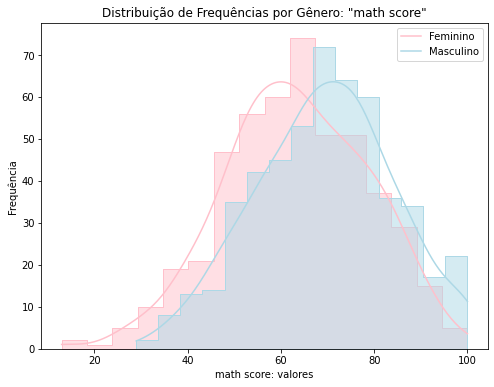

In [ ]:
fig = plt.figure(figsize=(8, 6))
plt.xlabel('math score: valores')
plt.ylabel('Frequência')
plt.title('Distribuição de Frequências por Gênero: "math score"')
sns.histplot(data=data_f, x="math score", kde=True, color='pink', element = 'step')
sns.histplot(data=data_m, x="math score", kde=True, color='lightblue', element = 'step')
plt.legend(labels=["Feminino","Masculino"])

#8.Conclusão
Embora o estudo tenha sido baseado em uma base de dados fictícia, fica evidente o poder de ferramenta estatísticas para a solução de problemas do mundo real. Utilizando dois testes de hipótese,  não-paramétrico e paramétrico, respectivamente, chegamos em conclusões específicas acerca da distribuição dos dados e de suas médias populacionais. 